<a href="https://colab.research.google.com/github/parthasarathi04/Data-Analysis-IPL/blob/main_branch/ipl_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Science & Business Analytics**
**#5 Tasks Exploratory Data Analysis - Sports
(Level - Advanced)**

# **Exploratory Data Analysis on IPL Dataset**

#     Author : Partha Sarathi Bhunia


---



#**Basics**
---

**Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing DataSet**

In [ ]:
match_df = pd.read_csv('/content/drive/MyDrive/COLAB/matches.csv')
delivery_df = pd.read_csv('/content/drive/MyDrive/COLAB/deliveries.csv')

In [ ]:
match_df.shape

(756, 18)

In [ ]:
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
delivery_df.shape

(179078, 21)

In [ ]:
delivery_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,wicket
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,0
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,0


In [ ]:
match_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
match_df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
match_df[match_df.winner.isnull()][['result','winner','player_of_match']]

,result,winner,player_of_match
300,no result,NaN,NaN
545,no result,NaN,NaN
570,no result,NaN,NaN
744,no result,NaN,NaN


In [ ]:
match_df[match_df.city.isnull()][['season','city']]

,season,city
461,2014,NaN
462,2014,NaN
466,2014,NaN
468,2014,NaN
469,2014,NaN
474,2014,NaN
476,2014,NaN


In [ ]:
match_df.city = match_df.city.fillna("UAE")
match_df.isna().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
match_df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [ ]:
delivery_df['batting_team'].value_counts()

Mumbai Indians                 22619
Kings XI Punjab                20931
Royal Challengers Bangalore    20908
Kolkata Knight Riders          20858
Chennai Super Kings            19762
Delhi Daredevils               18786
Rajasthan Royals               17292
Sunrisers Hyderabad            12908
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Delhi Capitals                  1909
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64

In [ ]:
teams = {
    'Sunrisers Hyderabad' : 'SRH', 'Mumbai Indians' : 'MI', 'Gujarat Lions' : 'GL',
    'Rising Pune Supergiants' : 'RPS', 'Rising Pune Supergiant': 'RPS', 'Royal Challengers Bangalore' : 'RCB',
    'Kolkata Knight Riders' : 'KKR', 'Delhi Daredevils' : 'DD', 'Kings XI Punjab' : 'KXIP',
    'Chennai Super Kings' : 'CSK', 'Rajasthan Royals' : 'RR', 'Deccan Chargers' : 'DC(old)',
    'Kochi Tuskers Kerala' : 'KTK', 'Pune Warriors' : 'PW','Delhi Capitals' : 'DC(new)'
}

print(len(teams))
teams

15


{'Chennai Super Kings': 'CSK',
 'Deccan Chargers': 'DC(old)',
 'Delhi Capitals': 'DC(new)',
 'Delhi Daredevils': 'DD',
 'Gujarat Lions': 'GL',
 'Kings XI Punjab': 'KXIP',
 'Kochi Tuskers Kerala': 'KTK',
 'Kolkata Knight Riders': 'KKR',
 'Mumbai Indians': 'MI',
 'Pune Warriors': 'PW',
 'Rajasthan Royals': 'RR',
 'Rising Pune Supergiant': 'RPS',
 'Rising Pune Supergiants': 'RPS',
 'Royal Challengers Bangalore': 'RCB',
 'Sunrisers Hyderabad': 'SRH'}

In [ ]:
match_df['winner'] = match_df['winner'].map(teams)
match_df['team1'] = match_df['team1'].map(teams)
match_df['team2'] = match_df['team2'].map(teams)
match_df['toss_winner'] = match_df['toss_winner'].map(teams)

delivery_df['batting_team'] = delivery_df['batting_team'].map(teams)
delivery_df['bowling_team'] = delivery_df['bowling_team'].map(teams)

match_df.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
match_df['team1'].unique()

array(['SRH', 'MI', 'GL', 'RPS', 'RCB', 'KKR', 'DD', 'KXIP', 'CSK', 'RR',
       'DC(old)', 'KTK', 'PW', 'DC(new)'], dtype=object)

#**IPL Matches Analysis**

---

---
**Season with most number of matches**

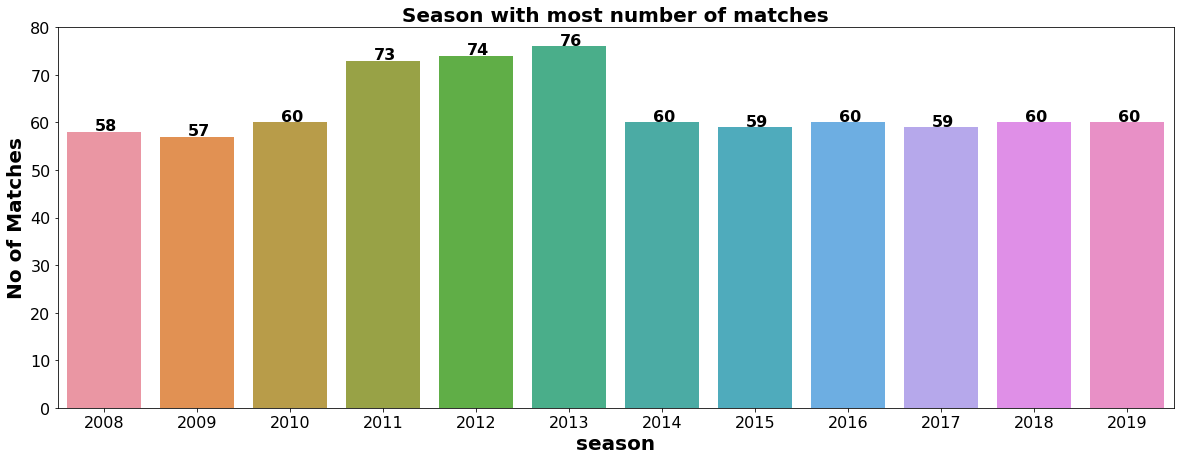

In [ ]:
season = match_df['season'].value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(figsize = (20.0, 7.0))
ax.set_ylim([0,80])
ax.set_title("Season with most number of matches", fontsize=20, fontweight='bold')
sns.barplot(x = season.index, y = season, orient='v')
plt.xlabel("season", fontsize=20, fontweight='bold')
plt.ylabel("No of Matches", fontsize=20, fontweight='bold')
plt.xticks(size=16)
plt.yticks(size=16)
for t in ax.patches:
    ax.text(t.get_x()+0.3,t.get_height()+0.3, int(t.get_height()), fontsize = 16, fontweight = 'bold')
plt.show()

---
**Venue with most Matches**

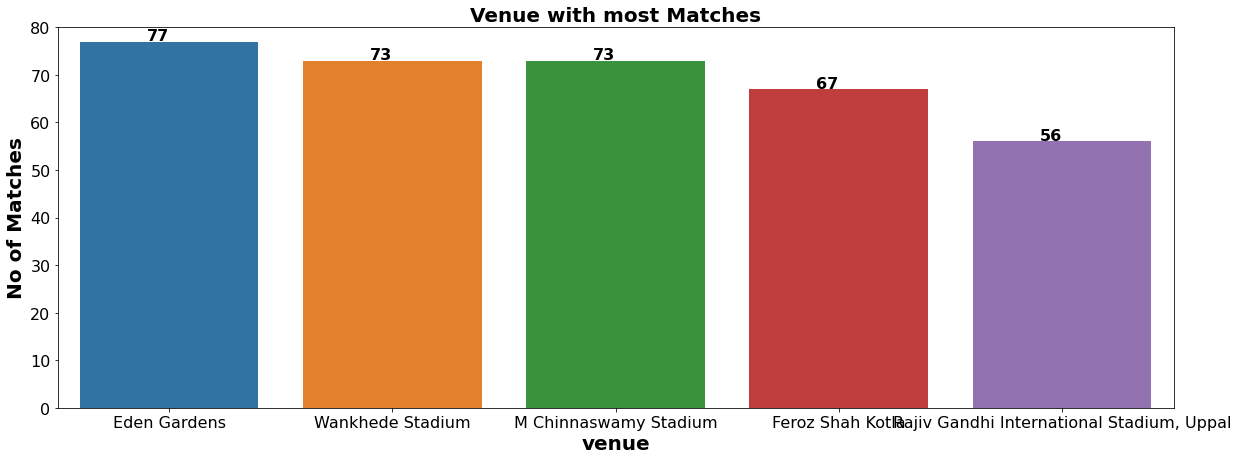

In [ ]:
venue = match_df['venue'].value_counts().sort_values(ascending=False)[:5]

fig, ax = plt.subplots(figsize = (20.0, 7.0))
ax.set_ylim([0,80])
ax.set_title("Venue with most Matches", fontsize=20, fontweight='bold')
sns.barplot(x = venue.index, y = venue, orient='v')
plt.xlabel("venue", fontsize=20, fontweight='bold')
plt.ylabel("No of Matches", fontsize=20, fontweight='bold')
plt.xticks(size=16)
plt.yticks(size=16)
for t in ax.patches:
    ax.text(t.get_x()+0.3,t.get_height()+0.3, int(t.get_height()), fontsize = 16, fontweight = 'bold')
plt.show()

---
**Teams With Most Numbers of Win**


In [ ]:
win = match_df['winner'].value_counts()
win

MI         109
CSK        100
KKR         92
RCB         84
KXIP        82
RR          75
DD          67
SRH         58
DC(old)     29
RPS         15
GL          13
PW          12
DC(new)     10
KTK          6
Name: winner, dtype: int64

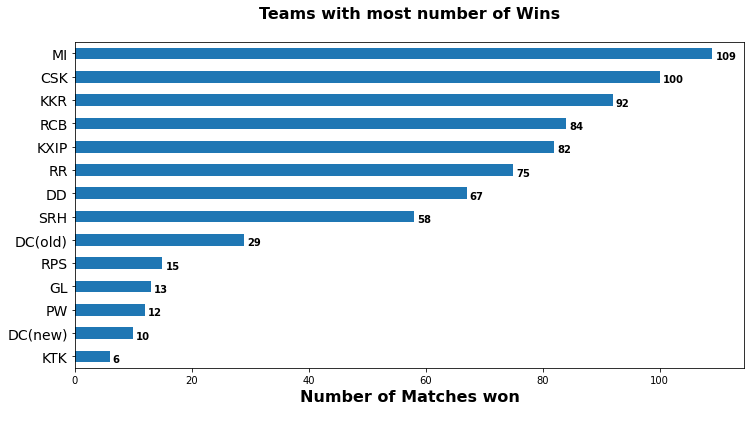

In [ ]:
g = win.plot.barh(figsize=(12,6))
g.invert_yaxis()
g.set_title("Teams with most number of Wins\n", fontsize = 16, fontweight = 'bold')
g.set_xlabel("Number of Matches won\n\n", fontsize = 16, fontweight = 'bold')
plt.yticks(size = 18)
plt.yticks(size = 14)

for t in g.patches:
    g.text(t.get_width()+0.5,t.get_y()+0.5, t.get_width(), fontsize = 10, fontweight = 'bold')

g

---
**Match info for win by maximum runs**

In [ ]:
match_df.iloc[match_df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                            MI
team2                            DD
toss_winner                      DD
toss_decision                 field
result                       normal
dl_applied                        0
winner                           MI
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [ ]:
match_df.iloc[match_df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                            MI
team2                            DD
toss_winner                      DD
toss_decision                 field
result                       normal
dl_applied                        0
winner                           MI
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

---
**Match info for win by minimum runs**






In [ ]:
match_df.iloc[match_df[match_df['win_by_runs'].ge(1)].win_by_runs.idxmin()]

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                                     MI
team2                                                    RPS
toss_winner                                               MI
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                                    MI
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

---
**Match info for win by maximum wickets**

In [ ]:
match_df.iloc[match_df['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                                  GL
team2                                                 KKR
toss_winner                                           KKR
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                                                KKR
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

---
**Match info for win by minimum wickets**

In [ ]:
match_df.iloc[match_df[match_df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                             560
season                        2015
city                       Kolkata
date                    2015-05-09
team1                         KXIP
team2                          KKR
toss_winner                   KXIP
toss_decision                  bat
result                      normal
dl_applied                       0
winner                         KKR
win_by_runs                      0
win_by_wickets                   1
player_of_match         AD Russell
venue                 Eden Gardens
umpire1               AK Chaudhary
umpire2            HDPK Dharmasena
umpire3                        NaN
Name: 559, dtype: object

---
**Maximum Title Winners**

In [ ]:
winner = match_df[['season','winner']]

title = {}
for x in sorted(winner.season.unique()):
    title[x] = winner[winner.season == x]['winner'].tail(1).values[0]

title_winner = pd.DataFrame(pd.Series(title), columns=['season_winner'])
title_winner


,season_winner
2008,RR
2009,DC(old)
2010,CSK
2011,CSK
2012,KKR
2013,MI
2014,KKR
2015,MI
2016,SRH
2017,MI


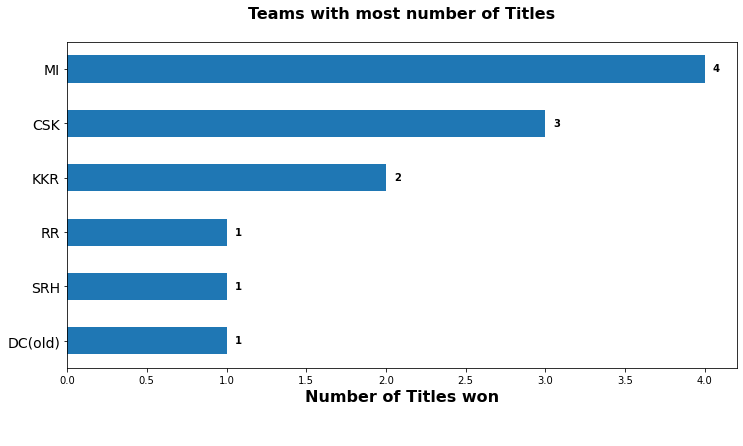

In [ ]:
g = title_winner['season_winner'].value_counts().plot.barh(figsize=(12,6))
g.invert_yaxis()
g.set_title("Teams with most number of Titles\n", fontsize = 16, fontweight = 'bold')
g.set_xlabel("Number of Titles won\n\n", fontsize = 16, fontweight = 'bold')
plt.yticks(size = 18)
plt.yticks(size = 14)

for t in g.patches:
    g.text(t.get_width()+0.05,t.get_y()+0.3, t.get_width(), fontsize = 10, fontweight = 'bold')

g

---
**Team with most number of Toss Wins**

MI         98
KKR        92
CSK        89
RCB        81
KXIP       81
RR         80
DD         80
SRH        46
DC(old)    43
PW         20
GL         15
RPS        13
DC(new)    10
KTK         8
Name: toss_winner, dtype: int64


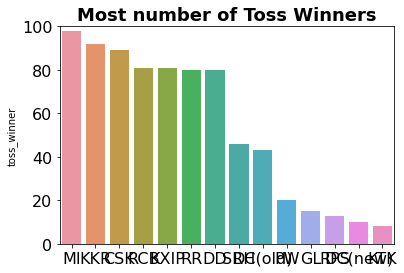

In [ ]:
toss = match_df.toss_winner.value_counts()
print(toss)


fig, ax = plt.subplots()
ax.set_ylim([0,100])
ax.set_title("Most number of Toss Winners" ,fontsize =18, fontweight='bold')
sns.barplot(x = toss.index, y = toss, orient='v')
plt.xticks(size=16)
plt.yticks(size=16)

plt.show()

---
**Decision after winning the toss**

756.0


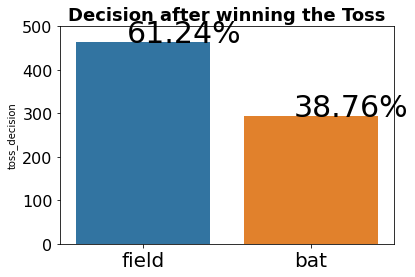

In [ ]:
decision = match_df['toss_decision'].value_counts()

fig, ax = plt.subplots()
ax.set_ylim([0,500])
ax.set_title("Decision after winning the Toss", fontsize =18, fontweight='bold')
sns.barplot(x = decision.index, y = decision, orient='v')
plt.xticks(size=20)
plt.yticks(size=16)

total = []
for i in ax.patches:
    total.append(i.get_height())

t = sum(total)
print(t)

for i in ax.patches:
    ax.text(i.get_x()+0.3, i.get_height(), str(round((i.get_height()/t)*100,2))+'%',fontsize=30)

plt.show()

---
**Most wins batting 1st/2nd**

In [ ]:
bat1 = match_df.winner[match_df.win_by_runs != 0].value_counts()
bat1

MI         57
CSK        52
KXIP       38
KKR        36
RCB        35
SRH        30
RR         27
DD         25
DC(old)    18
RPS         7
PW          6
DC(new)     3
KTK         2
GL          1
Name: winner, dtype: int64

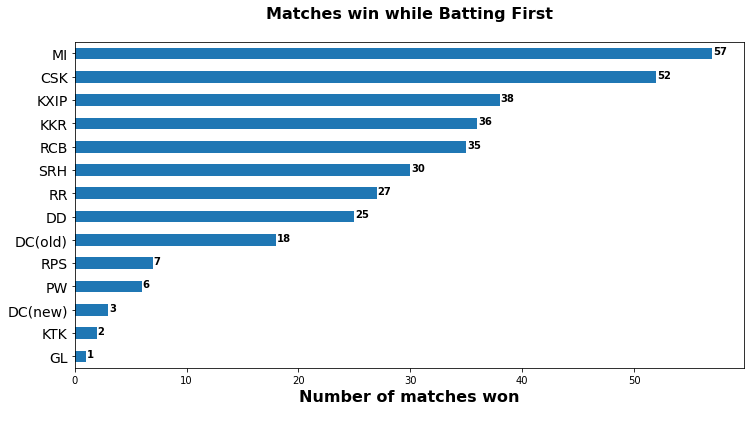

In [ ]:
g = bat1.plot.barh(figsize=(12,6))
g.invert_yaxis()
g.set_title("Matches win while Batting First\n", fontsize = 16, fontweight = 'bold')
g.set_xlabel("Number of matches won\n\n", fontsize = 16, fontweight = 'bold')
plt.yticks(size = 18)
plt.yticks(size = 14)

for t in g.patches:
    g.text(t.get_width()+0.05,t.get_y()+0.3, t.get_width(), fontsize = 10, fontweight = 'bold')

g

In [ ]:
bat2 = match_df.winner[match_df.win_by_wickets != 0].value_counts()
bat2

KKR        56
MI         50
CSK        48
RCB        48
RR         46
DD         42
KXIP       42
SRH        27
GL         12
DC(old)    11
RPS         8
PW          6
DC(new)     6
KTK         4
Name: winner, dtype: int64

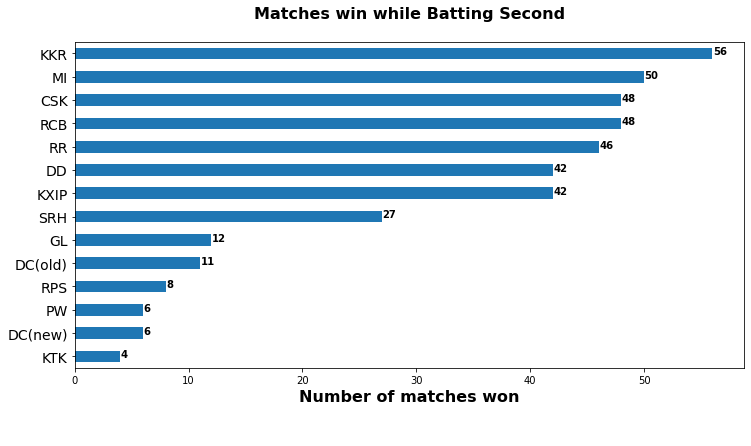

In [ ]:
g = bat2.plot.barh(figsize=(12,6))
g.invert_yaxis()
g.set_title("Matches win while Batting Second\n", fontsize = 16, fontweight = 'bold')
g.set_xlabel("Number of matches won\n\n", fontsize = 16, fontweight = 'bold')
plt.yticks(size = 18)
plt.yticks(size = 14)

for t in g.patches:
    g.text(t.get_width()+0.05,t.get_y()+0.3, t.get_width(), fontsize = 10, fontweight = 'bold')

g

---
**Close Wins**

In [ ]:
run1 = match_df.winner[match_df.win_by_runs == 1].value_counts()
run1

MI      3
KXIP    2
RCB     2
DD      1
CSK     1
GL      1
Name: winner, dtype: int64

In [ ]:
wicket1 = match_df.winner[match_df.win_by_wickets == 1].value_counts()
wicket1

KKR    1
SRH    1
CSK    1
Name: winner, dtype: int64

---
**Dismissal Type**

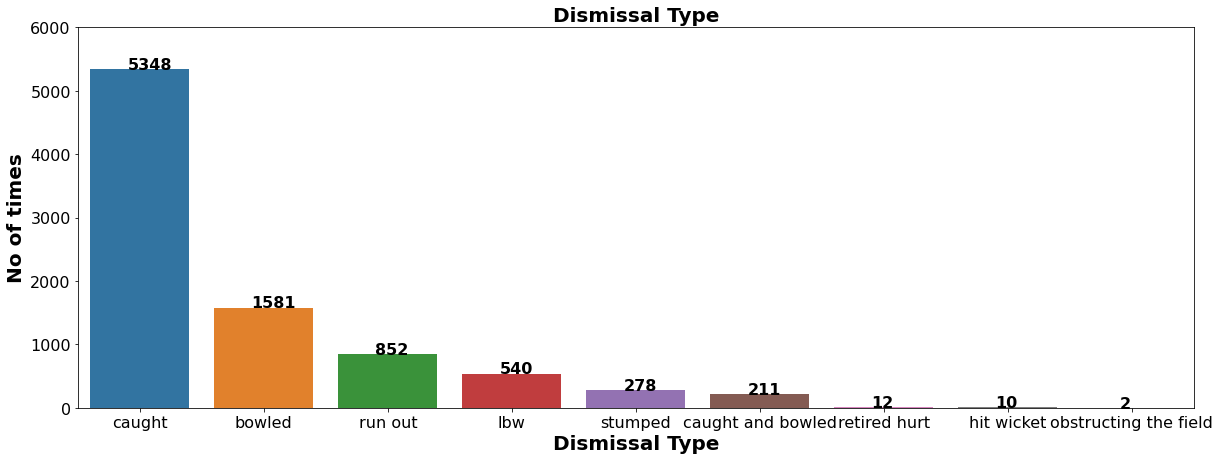

In [ ]:
dismiss = delivery_df['dismissal_kind'].value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(figsize = (20.0, 7.0))
ax.set_ylim([0,6000])
ax.set_title("Dismissal Type", fontsize=20, fontweight='bold')
sns.barplot(x = dismiss.index, y = dismiss, orient='v')
plt.xlabel("Dismissal Type", fontsize=20, fontweight='bold')
plt.ylabel("No of times", fontsize=20, fontweight='bold')
plt.xticks(size=16)
plt.yticks(size=16)
for t in ax.patches:
    ax.text(t.get_x()+0.3,t.get_height()+0.3, int(t.get_height()), fontsize = 16, fontweight = 'bold')
plt.show()

---
**D/L Method**

756.0


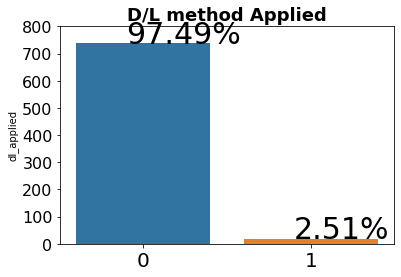

In [ ]:
dl = match_df['dl_applied'].value_counts()

fig, ax = plt.subplots()
ax.set_ylim([0,800])
ax.set_title("D/L method Applied", fontsize =18, fontweight='bold')
sns.barplot(x = dl.index, y = dl, orient='v')
plt.xticks(size=20)
plt.yticks(size=16)

total = []
for i in ax.patches:
    total.append(i.get_height())

t = sum(total)
print(t)

for i in ax.patches:
    ax.text(i.get_x()+0.3, i.get_height(), str(round((i.get_height()/t)*100,2))+'%',fontsize=30)

plt.show()

---
**Super Over**

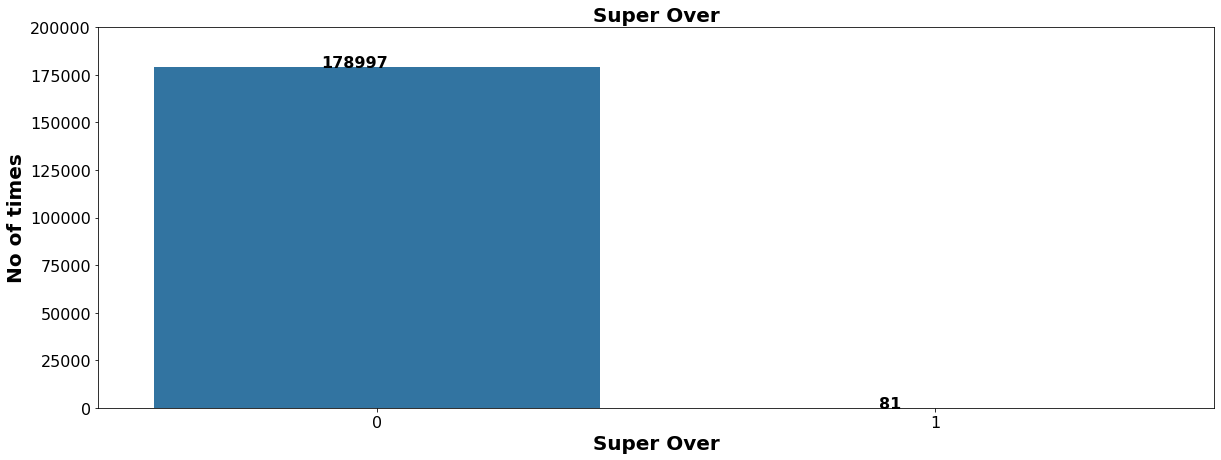

In [ ]:
super = delivery_df['is_super_over'].value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(figsize = (20.0, 7.0))
ax.set_ylim([0,200000])
ax.set_title("Super Over", fontsize=20, fontweight='bold')
sns.barplot(x = super.index, y = super, orient='v')
plt.xlabel("Super Over", fontsize=20, fontweight='bold')
plt.ylabel("No of times", fontsize=20, fontweight='bold')
plt.xticks(size=16)
plt.yticks(size=16)
for t in ax.patches:
    ax.text(t.get_x()+0.3,t.get_height()+0.3, int(t.get_height()), fontsize = 16, fontweight = 'bold')
plt.show()

#**IPL Player Analysis**
---

In [ ]:
delivery_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

---
**Total number of Batsman batted in IPL**

In [ ]:
len(delivery_df['batsman'].unique())

516

---
**Total number of Bowlers bowled in IPL**

In [ ]:
len(delivery_df['bowler'].unique())

405

---
**Most number of deliveries by any Batsman**

In [ ]:
batsmen = delivery_df['batsman'].value_counts()[:10]
batsmen

V Kohli       4211
SK Raina      4044
RG Sharma     3816
S Dhawan      3776
G Gambhir     3524
RV Uthappa    3492
DA Warner     3398
MS Dhoni      3318
AM Rahane     3215
CH Gayle      3131
Name: batsman, dtype: int64

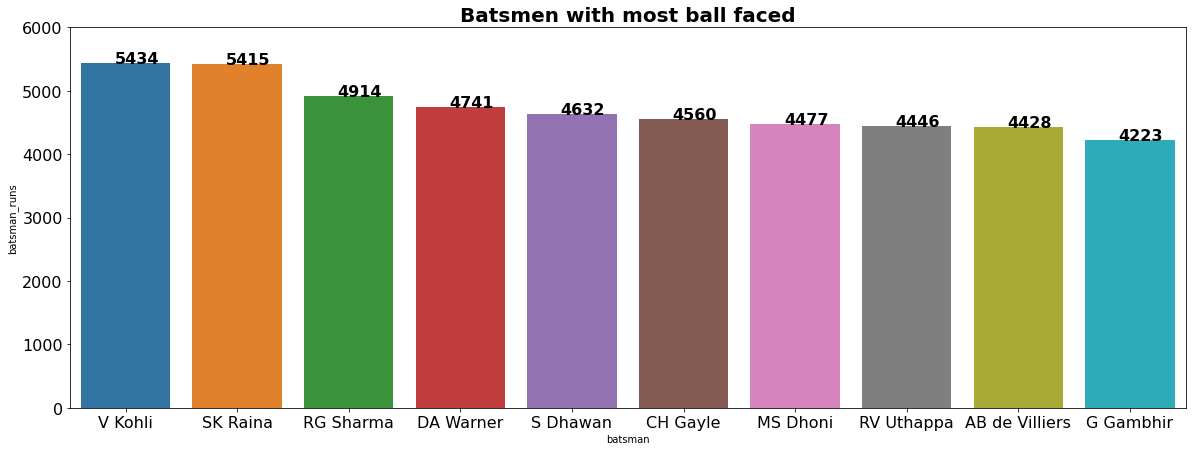

In [ ]:
fig, ax = plt.subplots(figsize = (20.0, 7.0))
ax.set_ylim([0,6000])
ax.set_title("Batsmen with most ball faced", fontsize=20, fontweight='bold')
sns.barplot(x = batsmen.index, y = batsmen, orient='v')
plt.xticks(size=16)
plt.yticks(size=16)
for t in ax.patches:
    ax.text(t.get_x()+0.3,t.get_height()+0.3, int(t.get_height()), fontsize = 16, fontweight = 'bold')
plt.show()

---
**Bowlers with most ball bowled**

In [ ]:
bowler = delivery_df['bowler'].value_counts()[:10]
bowler

Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
DJ Bravo           2711
B Kumar            2707
P Kumar            2637
UT Yadav           2605
SP Narine          2600
Name: bowler, dtype: int64

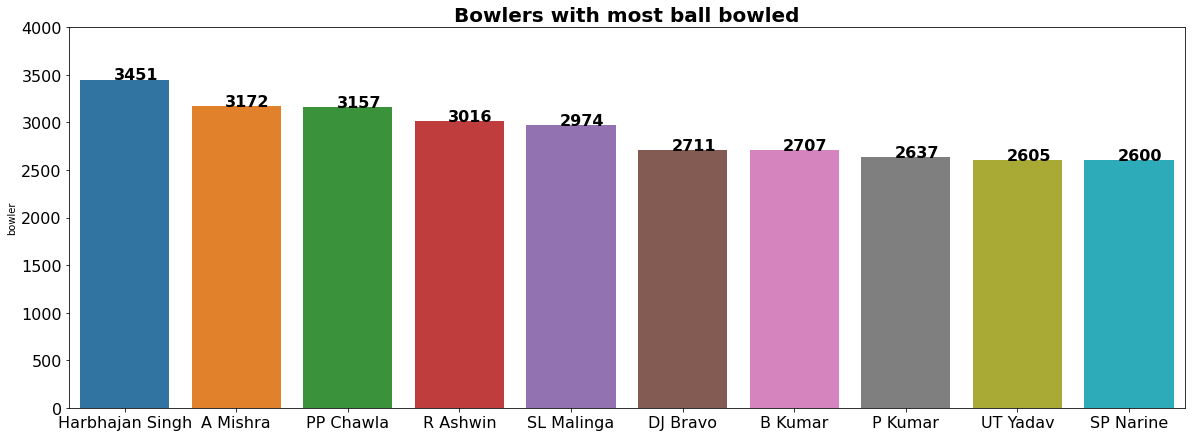

In [ ]:
fig, ax = plt.subplots(figsize = (20.0, 7.0))
ax.set_ylim([0,4000])
ax.set_title("Bowlers with most ball bowled", fontsize=20, fontweight='bold')
sns.barplot(x = bowler.index, y = bowler, orient='v')
plt.xticks(size=16)
plt.yticks(size=16)
for t in ax.patches:
    ax.text(t.get_x()+0.3,t.get_height()+0.3, int(t.get_height()), fontsize = 16, fontweight = 'bold')
plt.show()

---
**Players with most runs**

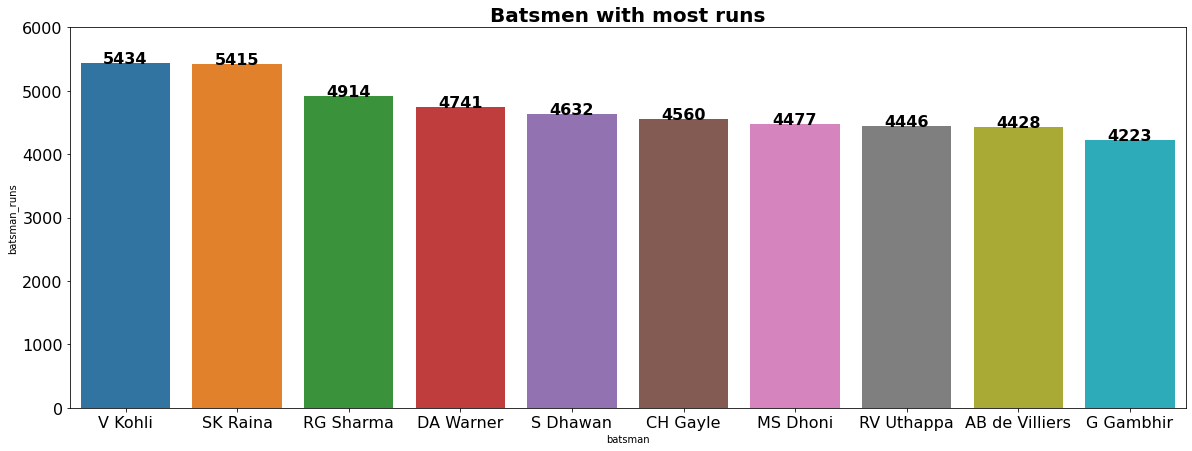

In [ ]:
batsmen = delivery_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[:10]

fig, ax = plt.subplots(figsize = (20.0, 7.0))
ax.set_ylim([0,6000])
ax.set_title("Batsmen with most runs", fontsize=20, fontweight='bold')
sns.barplot(x = batsmen.index, y = batsmen, orient='v')
plt.xticks(size=16)
plt.yticks(size=16)
for t in ax.patches:
    ax.text(t.get_x()+0.2,t.get_height()+0.01, int(t.get_height()), fontsize = 16, fontweight = 'bold')
plt.show()

---
**Compare Between Kohli, Raina, Rohit and Warner**

In [ ]:
new_df = pd.merge(match_df,delivery_df, left_on='id',right_on='match_id')

In [ ]:
def Batsman (player):
    df = new_df[new_df['batsman'] == player]
    df = df.groupby('season')['batsman_runs'].sum()
    return df

In [ ]:
kohli = Batsman('V Kohli')
kohli

season
2008    165
2009    246
2010    307
2011    557
2012    364
2013    639
2014    359
2015    505
2016    973
2017    308
2018    539
2019    472
Name: batsman_runs, dtype: int64

In [ ]:
raina = Batsman('SK Raina')
raina

season
2008    421
2009    434
2010    528
2011    438
2012    441
2013    548
2014    523
2015    374
2016    399
2017    442
2018    466
2019    401
Name: batsman_runs, dtype: int64

In [ ]:
rohit = Batsman('RG Sharma')
rohit

season
2008    404
2009    362
2010    404
2011    372
2012    433
2013    538
2014    390
2015    482
2016    489
2017    333
2018    297
2019    410
Name: batsman_runs, dtype: int64

In [ ]:
warner = Batsman('DA Warner')
warner

season
2009    163
2010    282
2011    324
2012    256
2013    410
2014    528
2015    562
2016    848
2017    641
2019    727
Name: batsman_runs, dtype: int64

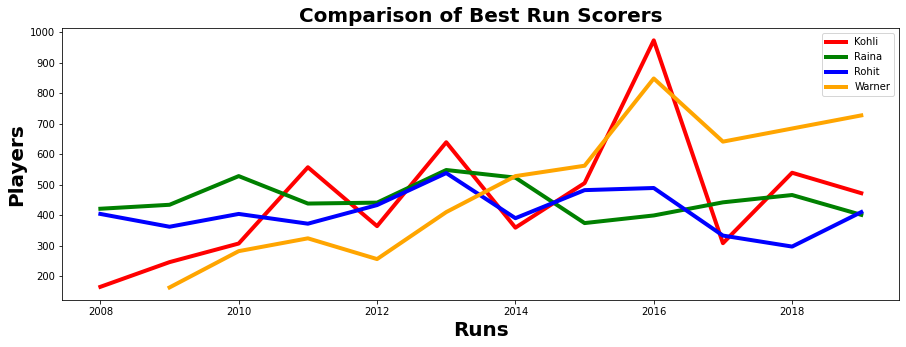

In [ ]:
kohli.plot(kind = 'line', figsize = (15,5), linewidth =4, color = 'red', label='Kohli')
raina.plot(kind = 'line', figsize = (15,5), linewidth =4, color = 'green', label='Raina')
rohit.plot(kind = 'line', figsize = (15,5), linewidth =4, color = 'blue', label='Rohit')
warner.plot(kind = 'line', figsize = (15,5), linewidth =4, color = 'orange', label='Warner')

plt.title("Comparison of Best Run Scorers", fontsize=20, fontweight='bold')
plt.xlabel("Runs", fontsize=20, fontweight='bold')
plt.ylabel("Players", fontsize=20, fontweight='bold')

plt.legend()
plt.show()

---
**Bowlers with most wickets**

In [ ]:
delivery_df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [ ]:
wicket = delivery_df.apply(lambda x: 1 if x['dismissal_kind'] not in ['run out', 'retired hurt','obstructing the field'] and not pd.isna(x['dismissal_kind']) else 0 , axis = 1)

df = delivery_df;
df ['wicket'] = wicket
df[['dismissal_kind','wicket']]


,dismissal_kind,wicket
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
...,...,...
179073,NaN,0
179074,NaN,0
179075,run out,0
179076,NaN,0


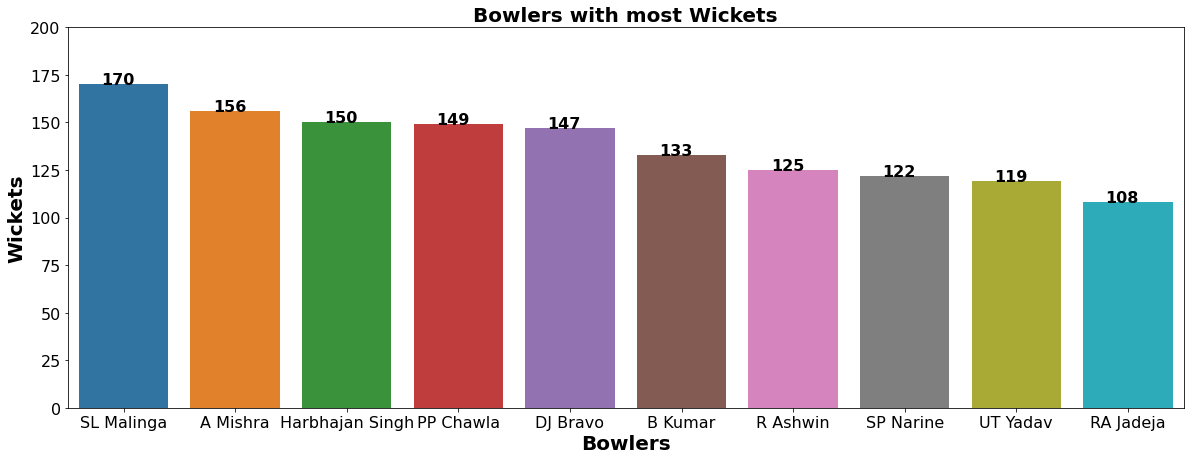

In [ ]:
bowler = df.groupby('bowler')['wicket'].sum().sort_values(ascending=False)[:10]

fig, ax = plt.subplots(figsize = (20.0, 7.0))
ax.set_ylim([0,200])
ax.set_title("Bowlers with most Wickets", fontsize=20, fontweight='bold')
sns.barplot(x = bowler.index, y = bowler, orient='v')
plt.xlabel("Bowlers", fontsize=20, fontweight='bold')
plt.ylabel("Wickets", fontsize=20, fontweight='bold')
plt.xticks(size=16)
plt.yticks(size=16)
for t in ax.patches:
    ax.text(t.get_x()+0.2,t.get_height()+0.01, int(t.get_height()), fontsize = 16, fontweight = 'bold')
plt.show()

---
**Batsman got out most number of time**

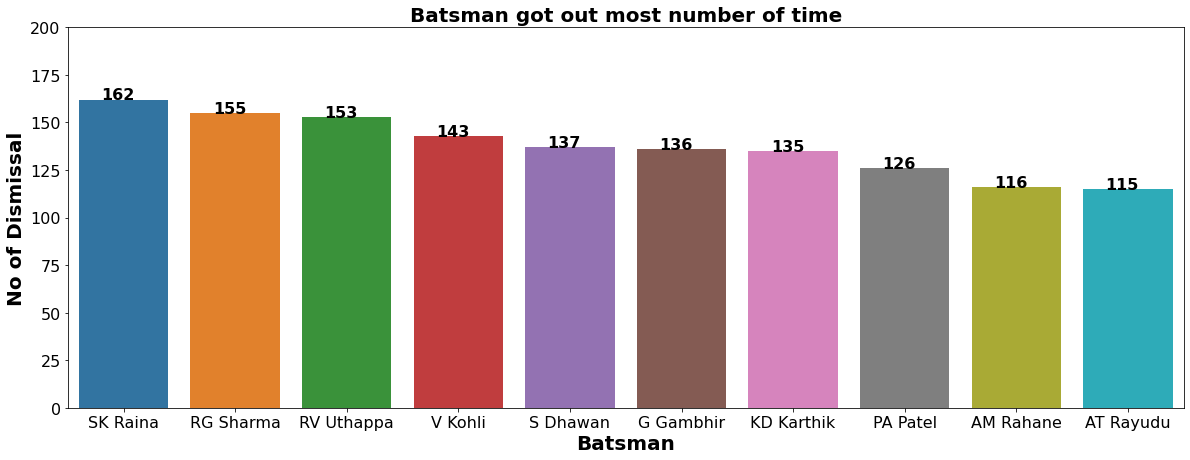

In [ ]:
batsman = df['player_dismissed'].value_counts().sort_values(ascending=False)[:10]

fig, ax = plt.subplots(figsize = (20.0, 7.0))
ax.set_ylim([0,200])
ax.set_title("Batsman got out most number of time", fontsize=20, fontweight='bold')
sns.barplot(x = batsman.index, y = batsman, orient='v')
plt.xlabel("Batsman", fontsize=20, fontweight='bold')
plt.ylabel("No of Dismissal", fontsize=20, fontweight='bold')
plt.xticks(size=16)
plt.yticks(size=16)
for t in ax.patches:
    ax.text(t.get_x()+0.2,t.get_height()+0.01, int(t.get_height()), fontsize = 16, fontweight = 'bold')
plt.show()

---
**Bowler with most number of Dissmisals of same Batsman**

In [ ]:
bowler = df.groupby('bowler')['player_dismissed'].value_counts().sort_values(ascending=False)[:10]
bowler

bowler         player_dismissed
Z Khan         MS Dhoni            7
PP Ojha        MS Dhoni            7
R Vinay Kumar  RG Sharma           6
B Kumar        AM Rahane           6
MM Sharma      AT Rayudu           6
A Mishra       RG Sharma           6
A Nehra        V Kohli             6
SP Narine      RG Sharma           6
PP Chawla      AT Rayudu           6
R Ashwin       RV Uthappa          6
Name: player_dismissed, dtype: int64

---
**Fielder involve most number of time in a Dismissal**

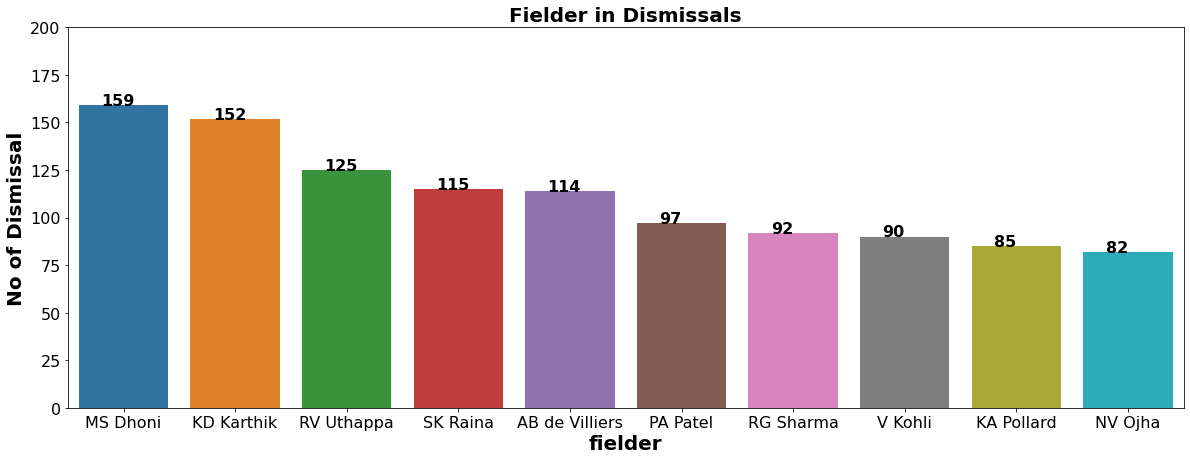

In [ ]:
fielder = delivery_df['fielder'].value_counts().sort_values(ascending=False)[:10]

fig, ax = plt.subplots(figsize = (20.0, 7.0))
ax.set_ylim([0,200])
ax.set_title("Fielder in Dismissals", fontsize=20, fontweight='bold')
sns.barplot(x = fielder.index, y = fielder, orient='v')
plt.xlabel("fielder", fontsize=20, fontweight='bold')
plt.ylabel("No of Dismissal", fontsize=20, fontweight='bold')
plt.xticks(size=16)
plt.yticks(size=16)
for t in ax.patches:
    ax.text(t.get_x()+0.2,t.get_height()+0.01, int(t.get_height()), fontsize = 16, fontweight = 'bold')
plt.show()

---
**Player with most numbers of MoM awards**

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64


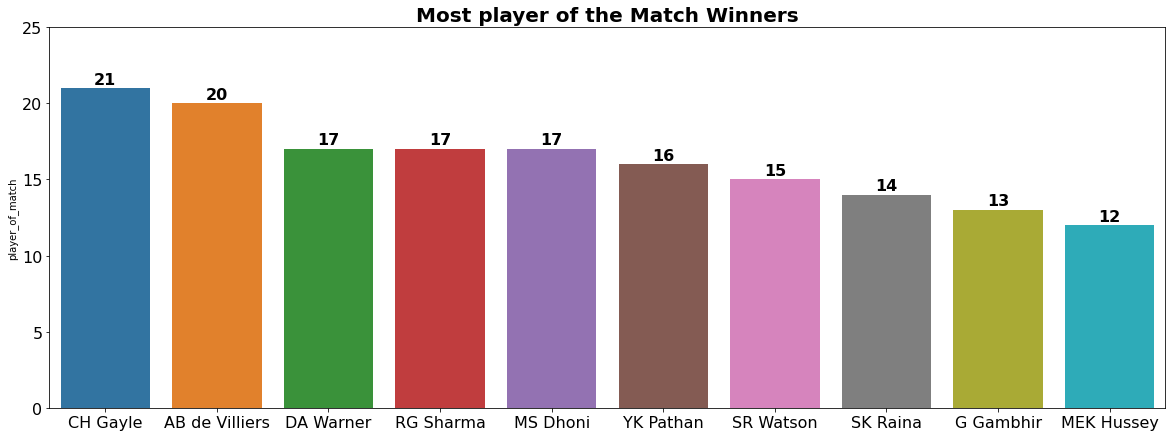

In [ ]:
top_players = match_df.player_of_match.value_counts()[:10]
print(top_players)

fig, ax = plt.subplots(figsize = (20.0, 7.0))
ax.set_ylim([0,25])
ax.set_title("Most player of the Match Winners", fontsize=20, fontweight='bold')
sns.barplot(x = top_players.index, y = top_players, orient='v')
plt.xticks(size=16)
plt.yticks(size=16)
for t in ax.patches:
    ax.text(t.get_x()+0.3,t.get_height()+0.3, int(t.get_height()), fontsize = 16, fontweight = 'bold')
plt.show()